In [2]:
#importing necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection   import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
#creating sample dataset as a dictionary first
data = {
    'Height':[170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight':[65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age':[30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender':[1, 0, 1, 1, 0, 1, 0, 1, 0, 0] # 1= male, 0= female   
}

#converting this dictionary to dataframe using pandas
#why: it is easier to deal with dataframe other than dictionaries

df = pd.DataFrame(data)

In [4]:
df.head()

,Height,Weight,Age,Gender
0,170,65,30,1
1,165,59,25,0
2,180,75,35,1
3,175,68,28,1
4,160,55,22,0


In [5]:
df


,Height,Weight,Age,Gender
0,170,65,30,1
1,165,59,25,0
2,180,75,35,1
3,175,68,28,1
4,160,55,22,0
5,172,70,32,1
6,168,62,27,0
7,177,74,33,1
8,162,58,24,0
9,158,54,21,0


In [6]:
#next step is to standarize the data
#ofc age and height are having different scales
#but here we do not need to standarize gender as its the target variable

#defining input variablle x and target varibale y
X = df.drop('Gender', axis=1)
y=df['Gender']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [7]:
#apply pca
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

In [8]:
x_train,x_test , y_train, y_test = train_test_split(x_pca,y,test_size=0.2, random_state=30)

In [9]:
model = LogisticRegression()
model.fit(x_train,y_train)

#getting predictions
y_pred= model.predict(x_test)

# our predicted values are in the y_pred variable
# our actucal values are in the y_test variable
#now we can see our model performance by comparing this y_pred and y_test

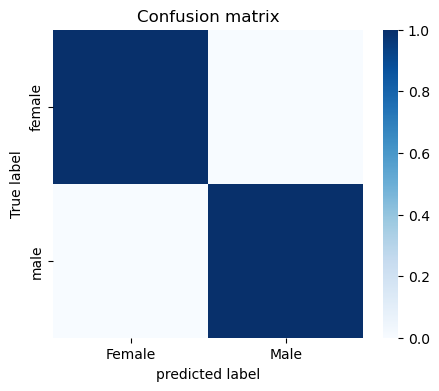

In [11]:
cm = confusion_matrix(y_test,y_pred)
cm

#plotting to get a better idea
plt.figure(figsize=(5,4))
sns.heatmap(cm, fmt='d', cmap='Blues', xticklabels = ['Female','Male'], yticklabels = ['female','male'])
plt.xlabel('predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()
                   


In [12]:
cm

array([[1, 0],
       [0, 1]], dtype=int64)

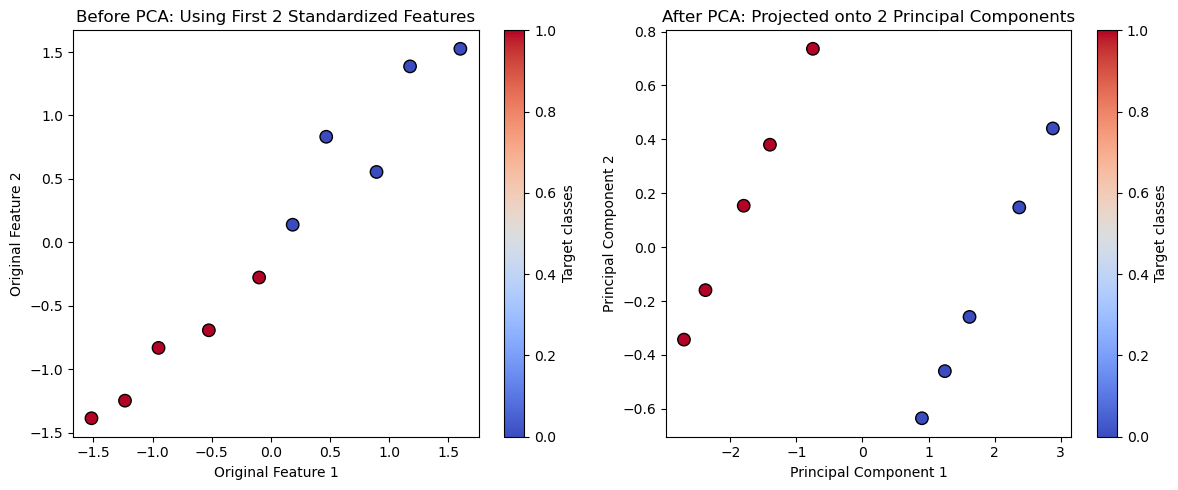

In [15]:
y_numeric = pd.factorize(y)[0]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA: Using First 2 Standardized Features')
plt.colorbar(label='Target classes')

plt.subplot(1, 2, 2)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected onto 2 Principal Components')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()